# # **NORMAL TASK 2 Customer Sentiment Analysis and Feedback Insights**# #  

**Loading the dataset**

In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
dataset_path = '/kaggle/input/purchase-behavior-dataset/purchase behaviou dataset.csv'
df = pd.read_csv(dataset_path)
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [26]:
df.head()
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06


 **Categorical Clustering pipeline**

In [27]:
# Select relevant features for clustering, including two categorical features
# Adjust this based on the specific columns in your dataset
selected_features = df[['LIFESTAGE', 'PREMIUM_CUSTOMER']]

# Handling missing values (if needed)
# Example: df.fillna(0, inplace=True)

# Separate numerical and categorical features
numeric_features = selected_features.drop(['LIFESTAGE', 'PREMIUM_CUSTOMER'], axis=1)
categorical_features = selected_features[['LIFESTAGE', 'PREMIUM_CUSTOMER']]

# Create a column transformer for preprocessing numerical and categorical features separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features.columns),
        ('cat', OneHotEncoder(), ['LIFESTAGE', 'PREMIUM_CUSTOMER'])
    ],
    remainder='passthrough'  # handle other columns without transformation
)

# Create a pipeline for preprocessing and clustering
pipeline = make_pipeline(preprocessor, KMeans(n_clusters=4, random_state=42))

# Fit the pipeline to the selected features
df['Cluster'] = pipeline.fit_predict(selected_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualize the clusters**

**1.Pair plot**

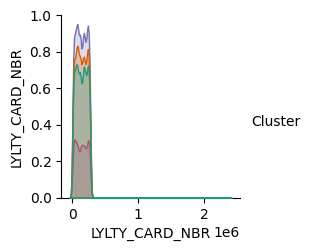

In [28]:
# Visualize the clusters
sns.pairplot(df, hue='Cluster', palette='Dark2', diag_kind='kde')
plt.show()

In [29]:
# Explore the characteristics of each cluster
cluster_centers = pd.DataFrame(pipeline.named_steps['kmeans'].cluster_centers_, columns=numeric_features.columns.tolist() + pipeline.named_steps['columntransformer'].named_transformers_['cat'].get_feature_names_out(['LIFESTAGE', 'PREMIUM_CUSTOMER']).tolist())
print(cluster_centers)


   LIFESTAGE_MIDAGE SINGLES/COUPLES  LIFESTAGE_NEW FAMILIES  \
0                          0.128475                0.031075   
1                          0.157867                0.040129   
2                          0.061463                0.045443   
3                          0.000000                0.000000   

   LIFESTAGE_OLDER FAMILIES  LIFESTAGE_OLDER SINGLES/COUPLES  \
0                  0.120178                         0.251031   
1                  0.133809                         0.233020   
2                  0.191050                         0.201430   
3                  0.000000                         0.000000   

   LIFESTAGE_RETIREES  LIFESTAGE_YOUNG FAMILIES  \
0            0.204630                  0.128580   
1            0.306234                  0.128941   
2            0.182019                  0.164160   
3            0.000000                  0.000000   

   LIFESTAGE_YOUNG SINGLES/COUPLES  PREMIUM_CUSTOMER_Budget  \
0                         0.136032          

**2.Heat Map**

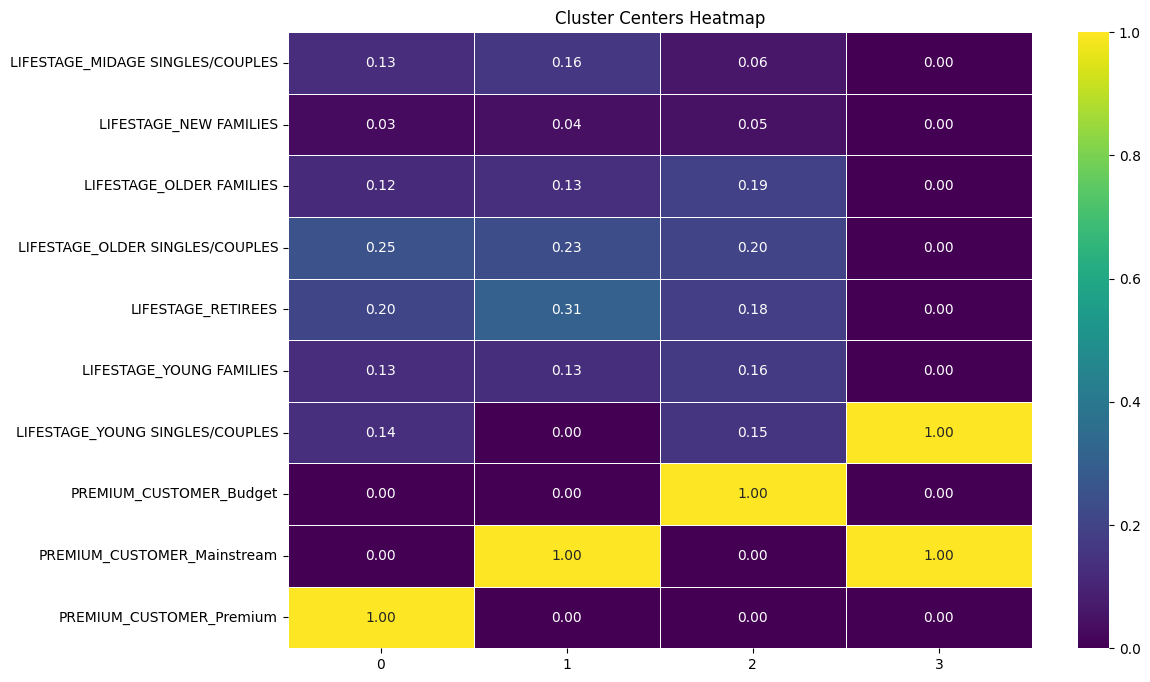

In [30]:
# Plot heatmap of cluster centers
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers.T, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Cluster Centers Heatmap')
plt.show()


**3.KMeans Clustering Plot**

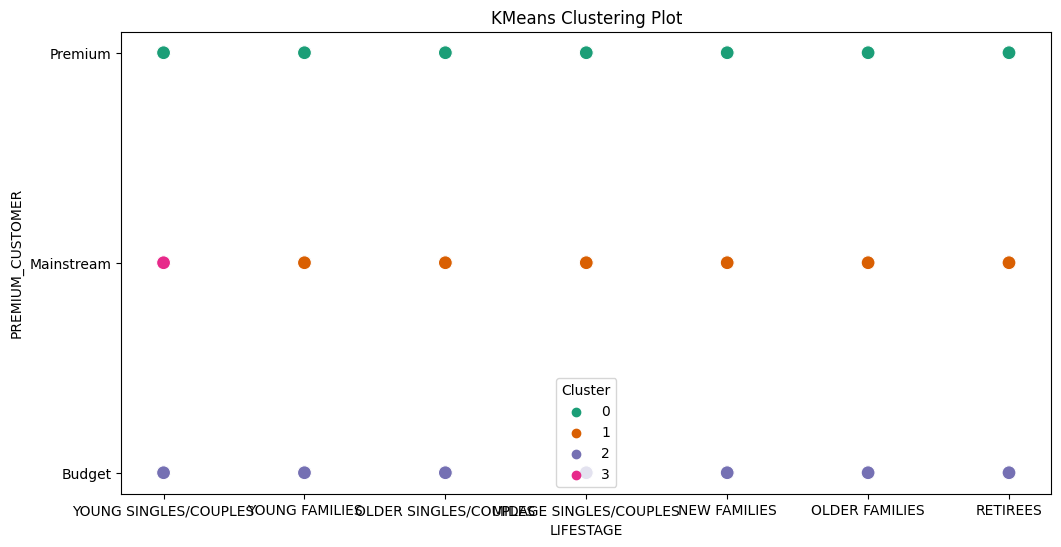

In [31]:
# KMeans clustering plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='LIFESTAGE', y='PREMIUM_CUSTOMER', hue='Cluster', palette='Dark2', s=100)
plt.title('KMeans Clustering Plot')
plt.show()


**4.Count Plot**

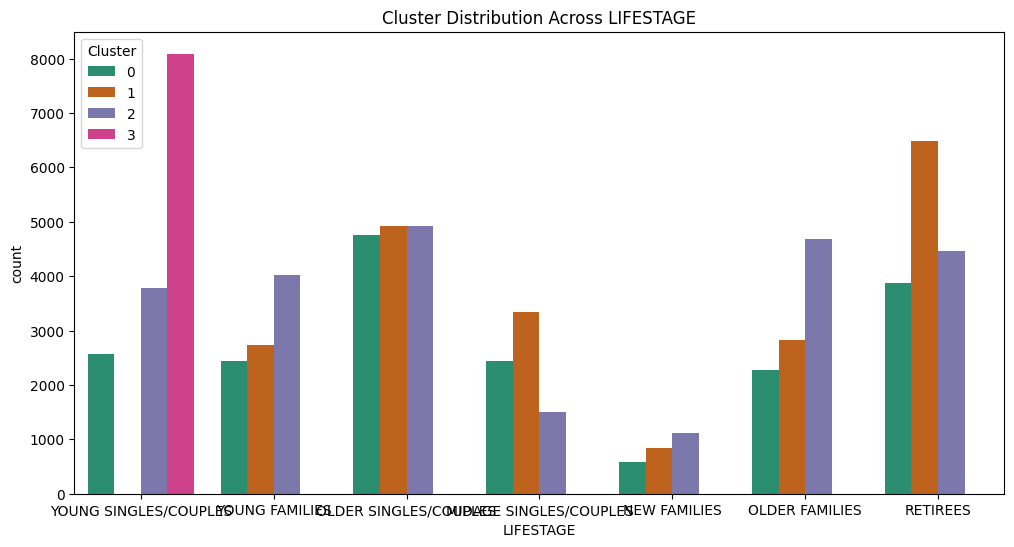

In [32]:
# Count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='LIFESTAGE', hue='Cluster', data=df, palette='Dark2')
plt.title('Cluster Distribution Across LIFESTAGE')
plt.show()